# Import necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Merge the 12 months data in a single csv

In [4]:
df=pd.read_csv(r"C:\Users\Hp\Downloads\Pandas\sales_data\Sales_April_2019.csv")
files=[file for file in os.listdir(r'C:\Users\Hp\Downloads\Pandas\sales_data')]
all_months_data=pd.DataFrame()
for file in files:
    df=pd.read_csv(r"C:/Users/Hp/Downloads/Pandas/sales_data/"+file)
    #append all data of every month to all_months_data
    all_months_data=pd.concat([all_months_data,df])
#saves 'all_months_data' dataframe 'to all_data' file into csv format
all_months_data.to_csv("all_data.csv", index=False)

# Read data in updated dataframe

In [5]:
all_data=pd.read_csv(r'C:\Users\Hp\Downloads\Pandas\all_data.csv')

In [6]:
all_data.shape

(186850, 6)

In [7]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [8]:
#adding a column separating month from the date

all_data['Month']=all_data['Order Date'].str[0:2]

In [9]:

all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04


In [10]:
# to get the count of nan
nan_df=all_data[all_data.isna().any(axis=1)]
nan_df.isnull().sum()
#clear NaN data 
all_data=all_data.dropna(how='any')

In [11]:
#since the month added is in string form ..convert it into int
all_data['Month']=all_data['Month'].astype('int32')

ValueError: invalid literal for int() with base 10: 'Or'

In [12]:
#to find the 'or' and delete
temp_df=all_data[all_data['Order Date'].str[0:2]=='Or']
print(temp_df)

        Order ID  Product  Quantity Ordered  Price Each  Order Date  \
519     Order ID  Product  Quantity Ordered  Price Each  Order Date   
1149    Order ID  Product  Quantity Ordered  Price Each  Order Date   
1155    Order ID  Product  Quantity Ordered  Price Each  Order Date   
2878    Order ID  Product  Quantity Ordered  Price Each  Order Date   
2893    Order ID  Product  Quantity Ordered  Price Each  Order Date   
...          ...      ...               ...         ...         ...   
185164  Order ID  Product  Quantity Ordered  Price Each  Order Date   
185551  Order ID  Product  Quantity Ordered  Price Each  Order Date   
186563  Order ID  Product  Quantity Ordered  Price Each  Order Date   
186632  Order ID  Product  Quantity Ordered  Price Each  Order Date   
186738  Order ID  Product  Quantity Ordered  Price Each  Order Date   

        Purchase Address Month  
519     Purchase Address    Or  
1149    Purchase Address    Or  
1155    Purchase Address    Or  
2878    Purchas

In [13]:
#deleting rows having 'Or' to remove the above error
all_data=all_data[all_data['Order Date'].str[0:2] !='Or']

In [14]:
#since the month added is in string form ..convert it into int after deleting the 'Or' rows
all_data['Month']=all_data['Month'].astype('int32')

# 1) what was the best month for sales ? how much was earned that month

In [15]:
#adding 'sales' column by multiplying sales=price*Qty_Ordered
all_data['sales']=all_data['Quantity Ordered']*all_data['Price Each']

TypeError: can't multiply sequence by non-int of type 'str'

In [16]:
#to remove above error convert columns to int  type
all_data['Quantity Ordered']= pd.to_numeric(all_data['Quantity Ordered']) #make int
all_data['Price Each']=pd.to_numeric(all_data['Price Each'])#make float

In [17]:
#adding 'sales' column by multiplying sales=price*Qty_Ordered after removing above error
all_data['sales']=all_data['Quantity Ordered']*all_data['Price Each']

In [18]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [19]:
 #answer to the question is 
    
results=all_data.groupby('Month').sum()
print(results)

       Quantity Ordered    Price Each         sales
Month                                              
1                 10903  1.811768e+06  1.822257e+06
2                 13449  2.188885e+06  2.202022e+06
3                 17005  2.791208e+06  2.807100e+06
4                 20558  3.367671e+06  3.390670e+06
5                 18667  3.135125e+06  3.152607e+06
6                 15253  2.562026e+06  2.577802e+06
7                 16072  2.632540e+06  2.647776e+06
8                 13448  2.230345e+06  2.244468e+06
9                 13109  2.084992e+06  2.097560e+06
10                22703  3.715555e+06  3.736727e+06
11                19798  3.180601e+06  3.199603e+06
12                28114  4.588415e+06  4.613443e+06


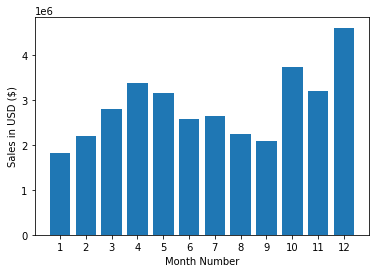

In [20]:
#ans----> DEcember was the best month for the sale  
Month=range(1,13) #13 is exclusive
plt.bar(Month,results['sales'])
plt.xticks(Month)#to see every months on x-axis
plt.xlabel('Month Number')
plt.ylabel('Sales in USD ($)')
plt.show()

# 2) Which city in the usa has the highest number of sales

In [21]:
#add a city column --- Use the .apply method
#all_data['city']=all_data['Purchase Address'].apply(lambda x:x.split(',')[1]) # it will split the , and grab the 1st index and x values here is the each cell(row) content
#alternative of lambda can be
def city_max(address):
    return address.split(',')[1]
def statewise(address):
    return address.split(',')[2]

all_data['city']=all_data['Purchase Address'].apply(lambda x:city_max(x) + ' ' + statewise(x))

In [22]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA 02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA 90001
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA 90001
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA 90001


In [23]:
# to get the rid of zip code in city 

def city_max(address):
    return address.split(',')[1]
def statewise(address):
    return address.split(',')[2].split(' ')[1]  #split(' ')[1] is to get rid of zipcode in the city column

all_data['city']=all_data['Purchase Address'].apply(lambda x:city_max(x) + ' ' + statewise(x))

In [24]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [25]:
city_max=all_data.groupby('city').sum()

In [26]:
city_max.head()

,Quantity Ordered,Price Each,Month,sales
city,,,,
Atlanta GA,16602,2.779908e+06,104794,2.795499e+06
Austin TX,11153,1.809874e+06,69829,1.819582e+06
Boston MA,22528,3.637410e+06,141112,3.661642e+06
Dallas TX,16730,2.752628e+06,104620,2.767975e+06
Los Angeles CA,33289,5.421435e+06,208325,5.452571e+06


In [27]:
all_data.sales.max()

3400.0

ValueError: shape mismatch: objects cannot be broadcast to a single shape

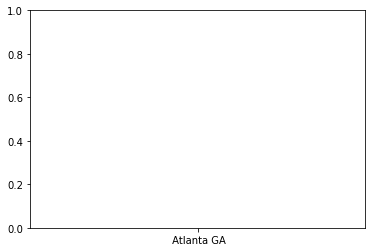

In [29]:
#ans----
#cities=all_data['city'].unique() #gives the unique citues on x axis
cities=[city for city,df in all_data.groupby('city')]
plt.bar(cities,results['sales'])
plt.xticks(cities,rotation='vertical',size=8)#to see every city name clearly on x-axis
plt.xlabel('cities')
plt.ylabel('Sales in USD ($)')
plt.show()

# 3) what time should we display advertisements to maximize likelihood of customer's buying product?

In [30]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [41]:
all_data.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int32
sales                      float64
city                        object
dtype: object

In [33]:
#since we are not aware about the same format of date so for that we will convert the order_date into an object using date/time
#library

all_data['Order Date']=pd.to_datetime(all_data['Order Date']) #converting from string to date/time column  

In [32]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [37]:
all_data.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int32
sales                      float64
city                        object
dtype: object

In [44]:
all_data['hour']=all_data['Order Date'].dt.hour # series.dt.hr/minute/seconds-- a method series as datetimelike and return several properties. Pandas Series.dt.hour attribute return a numpy array containing the hour of the datetime in the underlying data of the given series object.
all_data['minute']=all_data['Order Date'].dt.minute

In [45]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,hour,minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


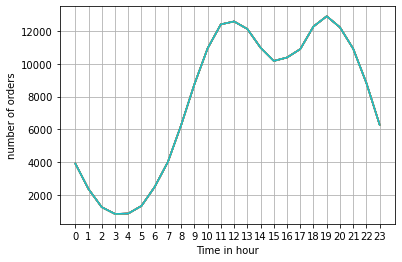

In [52]:
hour=[hour for hour, df in all_data.groupby('hour')]
plt.plot(hour,all_data.groupby(['hour']).count())
plt.grid()
plt.xticks(hour)
plt.xlabel('Time in hour')
plt.ylabel('number of orders')
plt.show()


In [ ]:
#ans:-- peak at 11am/7pm 

# 4) What products are more often sold together

In [72]:
#count all the duplicate order id's

df=all_data[all_data['Order ID'].duplicated(keep=False)] #wil check all the rows/cells in the order id column and see which ones are duplicated
#if it returns boolean series which is true only for Unique values. thrfore above keep=false means it will keep the duplicated values.
#keep: Controls how to consider duplicate value. It has only three distinct value and default is ‘first’.
#–> If ‘first’, it considers first value as unique and rest of the same values as duplicate.
#–> If ‘last’, it considers last value as unique and rest of the same values as duplicate.
#–> If False, it consider all of the same values as duplicates.

In [73]:
df.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,hour,minute
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19,42
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,19,42
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11,31
31,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11,31
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco CA,17,0
33,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco CA,17,0
119,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.95,New York City NY,11,7
120,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,11.95,New York City NY,11,7


In [74]:
#adding a new column 'grouped'(grouping on order id on purchaSE column)..using transform function..join will combine product by ,
df['grouped']=df.groupby('Order ID')['Product'].transform(lambda x:','.join(x)) 
#Python’s Transform function returns a self-produced dataframe with transformed values after applying the function specified in its parameter. This dataframe has the same length as the passed dataframe.



<ipython-input-74-4d7af3e59f72>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grouped']=df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


In [78]:
df.head()

,Order ID,grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [76]:
# since rows are repating drop the duplicated occurences of the same order/the same pairs in the order 
df=df[['Order ID','grouped']].drop_duplicates()


In [79]:
df.head(100)

,Order ID,grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
2662,179108,"Lightning Charging Cable,AAA Batteries (4-pack)"
2683,179128,"iPhone,Apple Airpods Headphones"
2718,179162,"Google Phone,USB-C Charging Cable"
2783,179226,"34in Ultrawide Monitor,Macbook Pro Laptop"


In [81]:
#to count the number of pairs that occurs most frequently this will be done by using new libraries

from itertools import combinations
from collections import Counter

In [83]:
count=Counter()

In [84]:
for row in df['grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2))) # for 2 pair together
print(count)
#answer is 'iPhone', 'Lightning Charging Cable'


Counter({('iPhone', 'Lightning Charging Cable'): 1005, ('Google Phone', 'USB-C Charging Cable'): 987, ('iPhone', 'Wired Headphones'): 447, ('Google Phone', 'Wired Headphones'): 414, ('Vareebadd Phone', 'USB-C Charging Cable'): 361, ('iPhone', 'Apple Airpods Headphones'): 360, ('Google Phone', 'Bose SoundSport Headphones'): 220, ('USB-C Charging Cable', 'Wired Headphones'): 160, ('Vareebadd Phone', 'Wired Headphones'): 143, ('Lightning Charging Cable', 'Wired Headphones'): 92, ('Lightning Charging Cable', 'Apple Airpods Headphones'): 81, ('Vareebadd Phone', 'Bose SoundSport Headphones'): 80, ('USB-C Charging Cable', 'Bose SoundSport Headphones'): 77, ('Apple Airpods Headphones', 'Wired Headphones'): 69, ('Lightning Charging Cable', 'USB-C Charging Cable'): 58, ('Lightning Charging Cable', 'AA Batteries (4-pack)'): 55, ('Lightning Charging Cable', 'Lightning Charging Cable'): 54, ('Bose SoundSport Headphones', 'Wired Headphones'): 53, ('AA Batteries (4-pack)', 'Lightning Charging Cable')

In [85]:
count.most_common(10) # more readable format

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

# 5) what product sold the most? and why ?


In [93]:
product_group=all_data.groupby('Product')

In [94]:
product_group.sum()

,Quantity Ordered,Price Each,Month,sales,hour,minute
Product,,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764,122252
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,184331
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,183480
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,455570
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815,142789


In [95]:
quantity_ordered=product_group.sum()['Quantity Ordered']

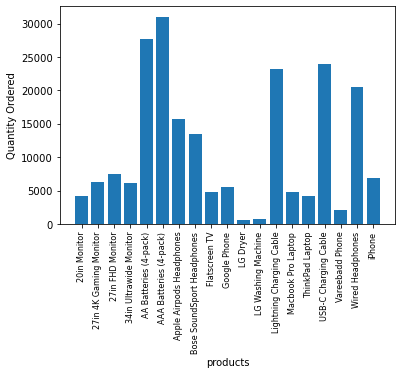

In [96]:
products=[product for product,df in product_group]
plt.bar(products,quantity_ordered)  #x will be products and y will be quantity ordered
plt.xticks(products,rotation='vertical',size=8)#to see every city name clearly on x-axis
plt.xlabel('products')
plt.ylabel('Quantity Ordered')
plt.show()

In [98]:
#overlay the graph withactual prices of the items

prices=all_data.groupby('Product').mean()['Price Each']

In [99]:
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


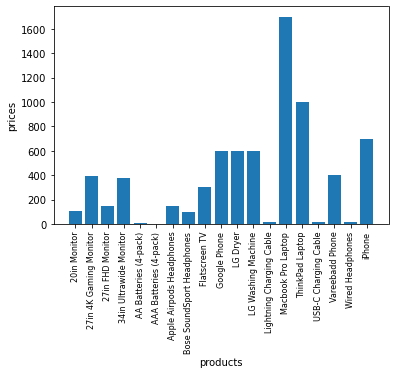

In [102]:
plt.bar(products,prices)  #x will be products and y will be quantity ordered
plt.xticks(products,rotation='vertical',size=8)#to see every city name clearly on x-axis
plt.xlabel('products')
plt.ylabel('prices')
plt.show()

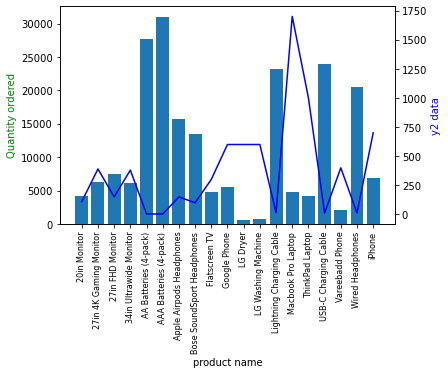

In [104]:
#add a second y axis to matplotlib chart--googled
prices=all_data.groupby('Product').mean()['Price Each']

fig,ax1=plt.subplots()

ax2=ax1.twinx()
ax1.bar(products,quantity_ordered)
ax2.plot(products,prices,'b-')
ax1.set_xlabel('product name')
ax1.set_ylabel('Quantity ordered',color='g')
ax2.set_ylabel('y2 data',color='b')
ax1.set_xticklabels(products,rotation='vertical',size=8)
plt.show()